In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
veri = pd.read_csv("data/olimpiyatlar.csv")
veri.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/olimpiyatlar_temizlenmis.csv'

In [57]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [58]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [59]:
# sütun isimlerini değiştirme
veri.rename(columns={
  'ID' : 'id',
  'Name' : 'isim',
  'Sex' : 'cinsiyet',
  'Age' : 'yas',
  'Height': 'boy',
  'Weight': 'kilo',
  'Team': 'takim',
  'NOC':'uok',
  'Games': 'oyunlar',
  'Year': 'yil',
  'Season': 'sezon',
  'City': 'sehir',
  'Sport': 'spor',
  'Event': 'etkinlik',
  'Medal': 'madalya'
}, inplace=True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [60]:
# drop fonksiyonu ile id ve oyunlar sütunlarını çıkarıyoruz
veri = veri.drop([
  "id", "oyunlar"
], axis=1) #axis 1 = sütun
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [61]:
#kayıp veri sorunu
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [62]:
essiz_etkinlik = pd.unique(veri.etkinlik) # etklinlik sayısı
print(f"Eşsiz etkinlik sayısı: {format(len(essiz_etkinlik))}")
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [63]:
# her bir etkinliği iteratif olarak dolaş
# her bir etkinlik özelinde boy ve kilo ortalamalarını hesapla
# etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle
veri_gecici = veri.copy() # gercek veriyi yedekle
boy_kilo_liste = ["boy", "kilo"]
for e in essiz_etkinlik:
  # etkinlik filtresi oluştur
  etkinlik_filtre = veri_gecici.etkinlik == e
  # veriyi etkinliğe göre filtrele
  veri_filtreli = veri_gecici[etkinlik_filtre]
  
  # boy ve kilo için etkinlik özelinde ortalamaları hesapla
  for s in boy_kilo_liste:
      ortalama = np.round(np.mean(veri_filtreli[s]), 2)
      if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa ~ 
        veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
      else: 
        tüm_veri_ortalamasi = np.round(np.mean(veri[s]), 2)
        veri_filtreli[s] = veri_filtreli[s].fillna(tüm_veri_ortalamasi)
     
  # etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitle
  veri_gecici[etkinlik_filtre] = veri_filtreli
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle 
veri = veri_gecici.copy()
veri.info()  # boy ve kilo sütunlarında kayıp değer sayısını göster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [64]:
# yaş değişkeninde tanımlı olmayan değerleri bul
yas_ortalaması = np.round(np.mean(veri.yas), 2)
print(f"Yaş ortalaması :{format(yas_ortalaması)} ")
veri["yas"] = veri["yas"].fillna(yas_ortalaması)
veri.info()

Yaş ortalaması :25.56 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [65]:
# madalya almayan sporcuları veri setinden çıkar
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [66]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [67]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [68]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [69]:
# Sonradan kullanabilmek için elde ettiğimiz veriyi kaydediyoruz
veri.to_csv("olimpiyatlar_temizlenmis.csv", index=False)

In [70]:
#  öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyonu yazalım
def plotHistogram(degisken):
  """
      Girdi: Değişken / sütun ismi
      Çıktı: İlgili değişkenin histogramı
  """
  plt.figure()
  plt.hist(veri[degisken], bins= 85, color= "orange")
  plt.xlabel(degisken)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()

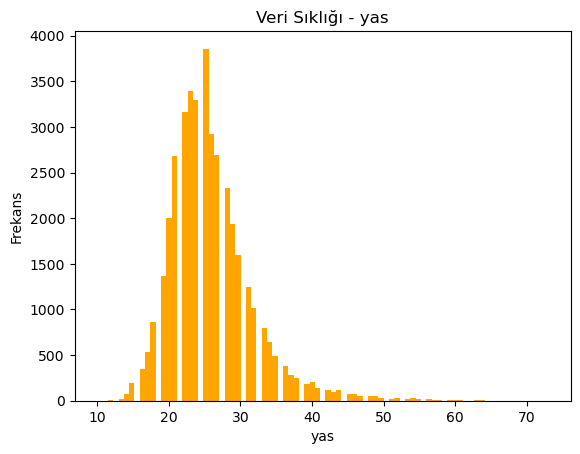

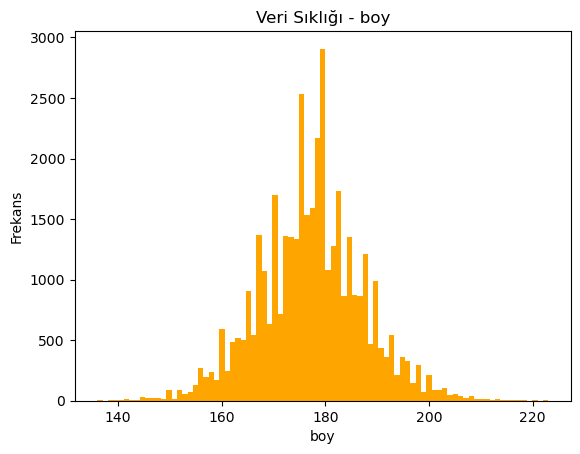

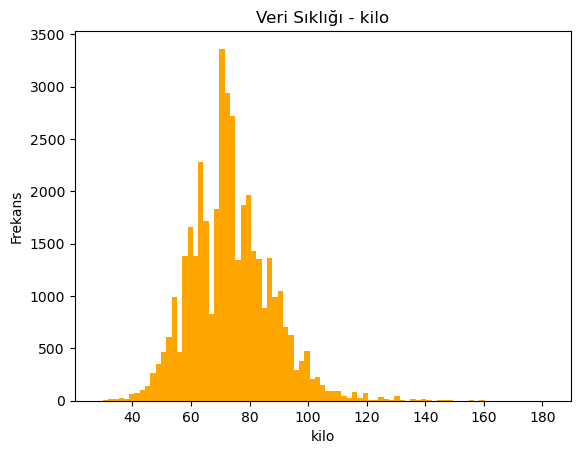

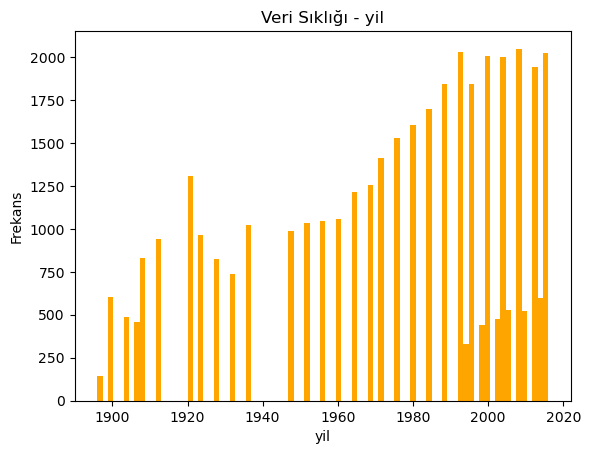

In [71]:
# tüm sayısal değişkenler için histogramları çizdirelim
sayısal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayısal_degisken:
  plotHistogram(i)

In [72]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


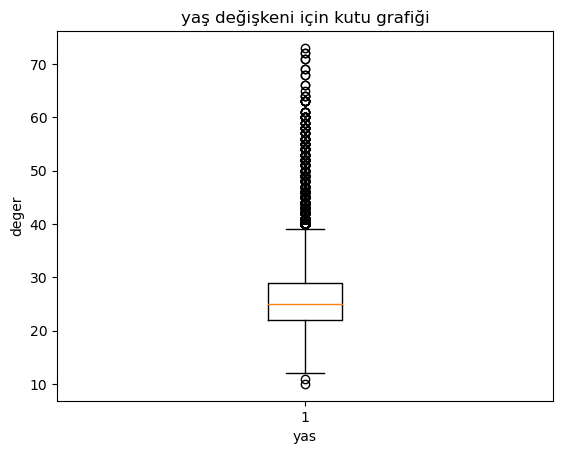

In [73]:
plt.boxplot(veri.yas)
plt.title("yaş değişkeni için kutu grafiği")
plt.xlabel("yas")
plt.ylabel("deger")
plt.show()

In [74]:
# öncelikle çubuk grafiği çizdireceğimiz metodu yazalım
def plotBar(degisken, n=5):
  """
    Girdi : Değişken / sütun ismi
            n = Gösterilecek eşşiz değer sayısı
    Çıktı : Çubuk grafiği
  """
  veri_ = veri[degisken]
  veri_sayma = veri_.value_counts()
  veri_sayma = veri_sayma[:n]
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color="orange")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation = 45)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı - {} ".format(degisken))
  plt.show()
  print("{}: \n {}".format(degisken, veri_sayma))
  

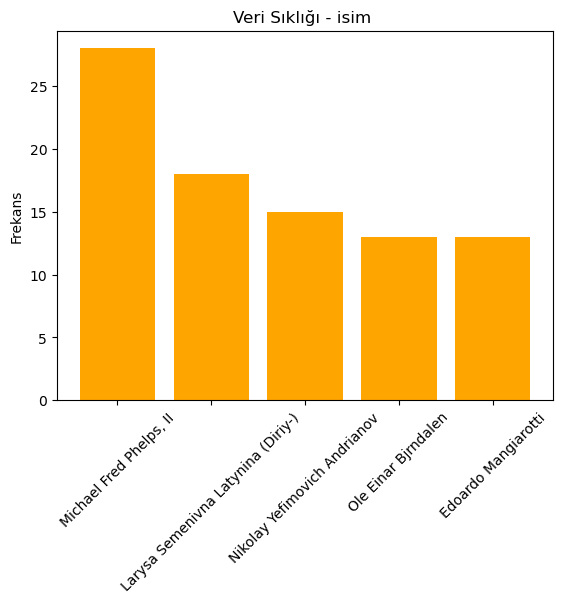

isim: 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


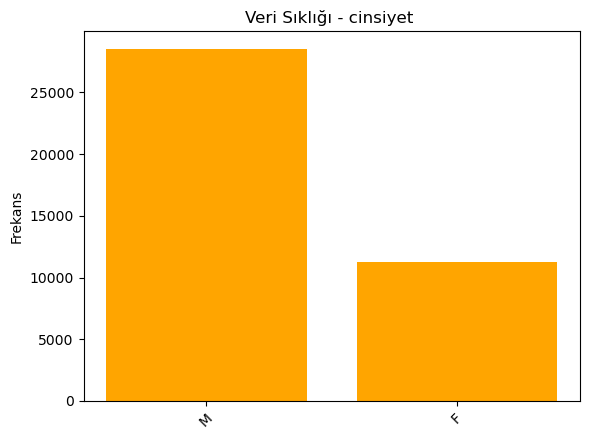

cinsiyet: 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64


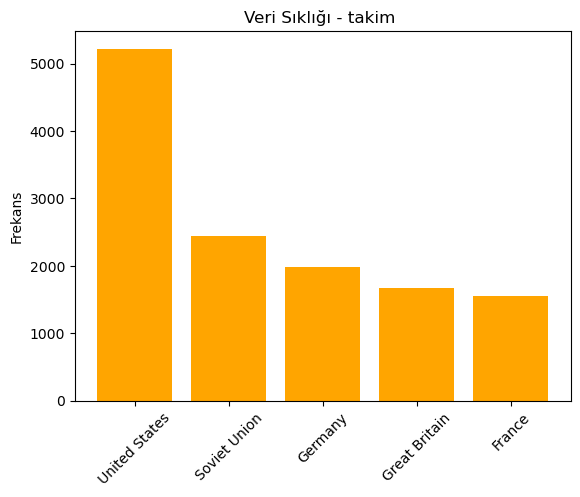

takim: 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


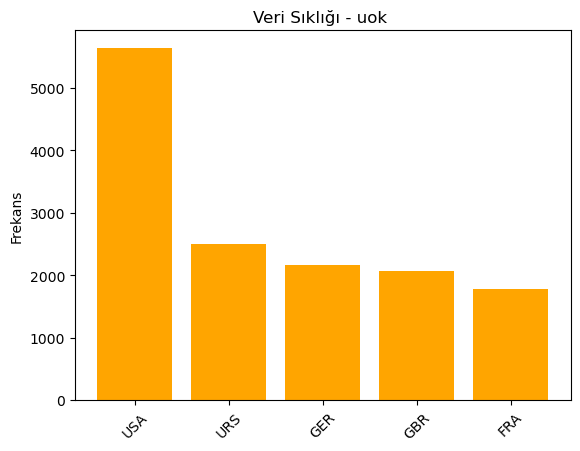

uok: 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


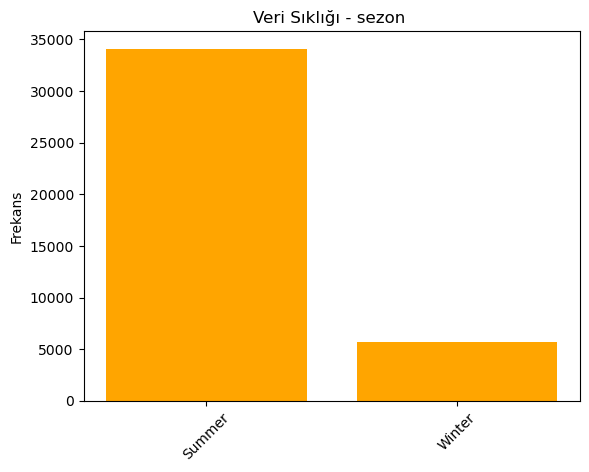

sezon: 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


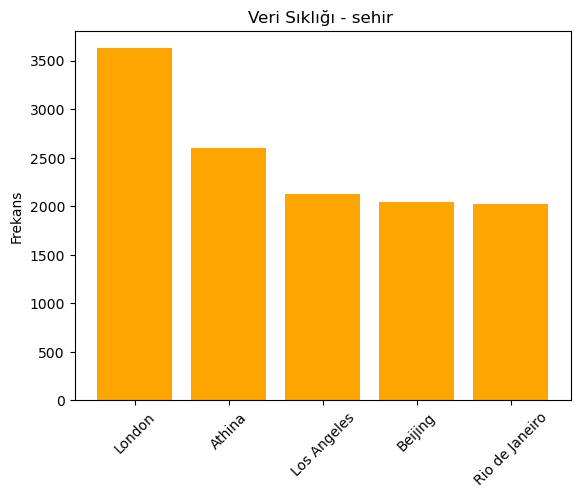

sehir: 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


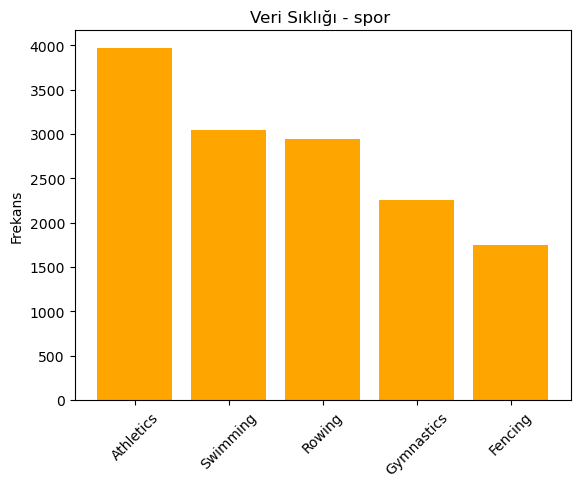

spor: 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


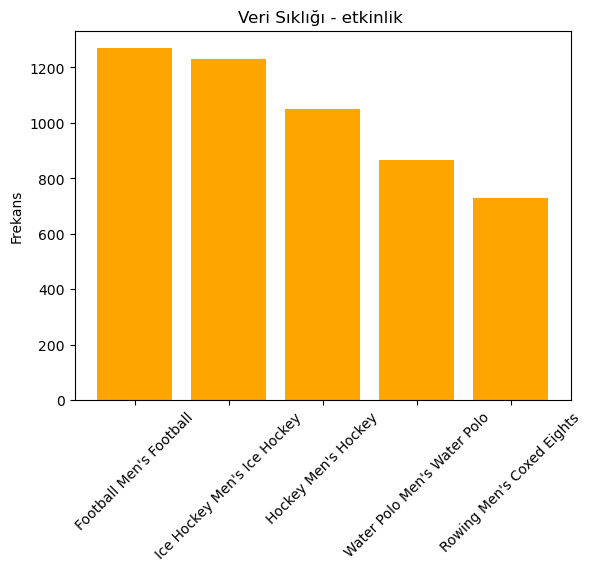

etkinlik: 
 etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


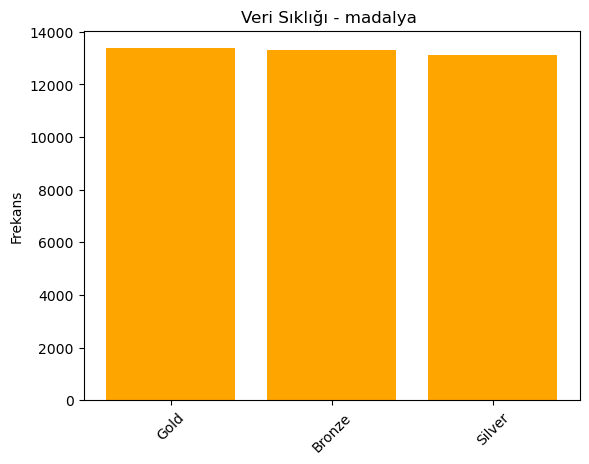

madalya: 
 madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [75]:
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik","madalya"]
for i in kategorik_degisken:
  plotBar(i)

In [76]:
# cinsiyete göre boy ve ağırlık karşılaştırması
erkek = veri[veri.cinsiyet == "M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [77]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


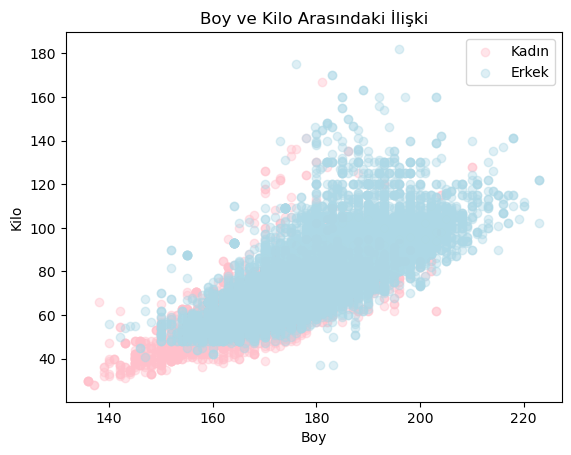

In [78]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label = "Kadın", color = "pink")
plt.scatter(erkek.boy, erkek.kilo, alpha=0.4, label = "Erkek", color = "lightblue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [79]:
veri.loc[:, ["yas", "boy", "kilo"]].corr() # korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [80]:
# Madalya ve Yaş arasındaki İlişki
# sporcularımızı altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=["madalya"])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [81]:
veri_gecici.loc[:, ["yas", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [82]:
# Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları
veri_gecici[["takim", "madalya_Bronze",	"madalya_Gold",	"madalya_Silver"]].groupby(["takim"], as_index= False).sum().sort_values(by = "madalya_Gold", ascending= False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [83]:
# Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı 
veri_gecici[["sehir", "madalya_Bronze",	"madalya_Gold",	"madalya_Silver"]].groupby(["sehir"], as_index= False).sum().sort_values(by = "madalya_Gold", ascending= False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [84]:
# Cinsiyete Göre Kazanılan Altın, Gümüş, Bronz Madalya Sayısı
veri_gecici[["cinsiyet", "madalya_Bronze",	"madalya_Gold",	"madalya_Silver"]].groupby(["cinsiyet"], as_index= False).sum().sort_values(by = "madalya_Gold", ascending= False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [85]:
# Çok Değişkenli Veri Analizi

In [86]:

#Pivot Tablosu
veri_pivot = veri.pivot_table(index="madalya", columns="cinsiyet",
                              values=["boy", "kilo","yas"],
                              aggfunc={"boy":np.mean, "kilo":np.mean, "yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

In [87]:
# Anomali Tespiti: aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır.

def anomaliTespiti(df, ozellik):
  outlier_indices= []
  
  for c in ozellik:
    # 1. çeyrek
    Q1 = np.percentile(df[c], 25)
    # 3. çeyrek
    Q3 = np.percentile(df[c], 75)
    # IQR = Inter Quartile Range
    IQR = Q3-Q1
    # aykırı değer için ek adım miktarı
    outlier_step = 1.5 * IQR
    # aykırı değeri ve bulunduğu indeksi tespit edelim
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # tespit edilen indeksleri depola
    outlier_indices.extend(outlier_list_col)
    
  # eşşiz aykırı değerleri bulma
  outlier_indices = Counter(outlier_indices) 
  
  # eğer bir örnel v adet sütunda farklı ise bunu aykırı olarak kabul et 
  multiplie_outliers = list(i for i, v in outlier_indices.items() if v>1)
  

  return multiplie_outliers

In [88]:
veri_anomali = veri.loc[anomaliTespiti(veri, ["yas", "kilo", "boy"])]
veri_anomali.spor.value_counts()


spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

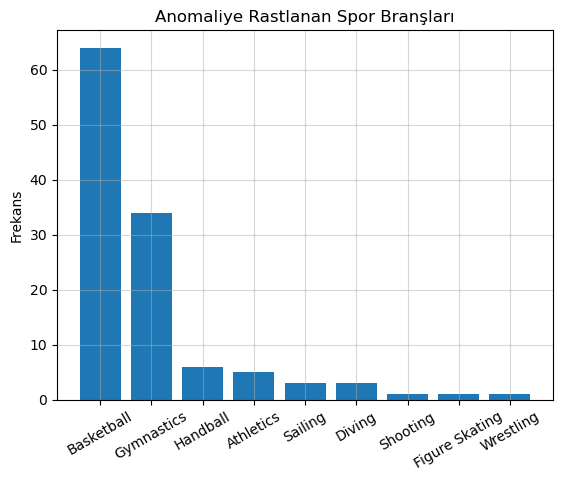

In [89]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30 )
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha = 0.5)
plt.show()

In [90]:
veri_gym = veri_anomali[veri_anomali.spor == 'Gymnastics']
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [91]:
veri_gym.etkinlik.value_counts()

etkinlik
Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: count, dtype: int64

In [92]:
veri_basketbol  = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [93]:
veri_basketbol.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

In [94]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [95]:
# olimpiyatlararın gerçekleştirildiği yıllar
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [96]:
# olimpiyataların yapışdığı yılların sıralanması
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

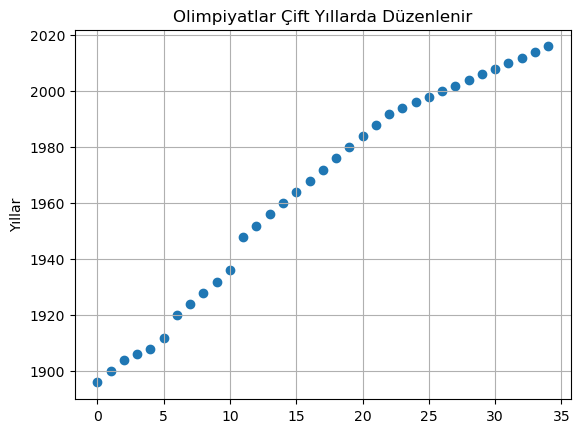

In [97]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [98]:
# veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürme
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format= "%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [99]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [100]:
# veri_zaman değişkeninin ana indeksini, datatime tipi olan tari_saat değerini güncelleyelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis=1, inplace=True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


In [110]:
# sayısal ve string verileri ayırma, 2 yıllık periyotlar halinde  gösterim
str_sutunlar = veri_zaman.select_dtypes(include='object')
sayisal_sutunlar = veri_zaman.select_dtypes(exclude='object')

periyodik_veri = sayisal_sutunlar.resample("2A").mean()
periyodik_veri

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823
...,...,...,...
2008-12-31,26.046875,178.299761,74.263145
2010-12-31,26.723077,175.759615,72.840615
2012-12-31,26.066461,178.305755,73.726399


In [112]:
# kayip verileri çıkarma
periyodik_veri.dropna(axis=0,inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

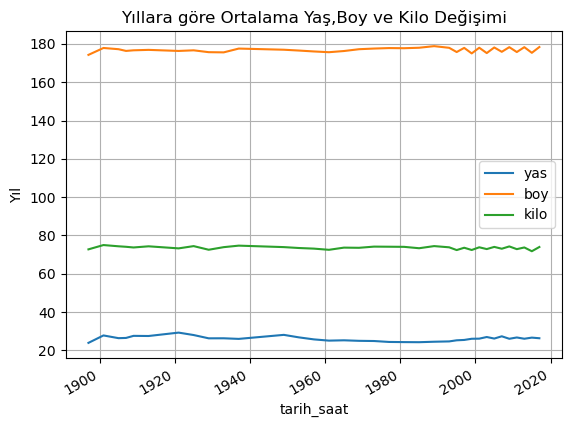

In [113]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre Ortalama Yaş,Boy ve Kilo Değişimi")
plt.ylabel("Yıl")
plt.grid(True)
plt.show()

In [114]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,True,False,False


In [117]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
# kayip verileri çıkarma
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2008-12-31,Ragnhild Margrethe AamodtJos Luis Abajo GmezMa...,FMFMMMMFMFFMFMMFMMFFMMFMFFMMMMMMMMMMMFMFMMMMFF...,53344.0,365157.91,152090.92,NorwaySpainRussiaBelarusFranceFranceAustraliaU...,NORESPRUSBLRFRAFRAAUSUSATJKTURRUSFRAROUARGCUBN...,SummerSummerSummerSummerSummerSummerSummerSumm...,BeijingBeijingBeijingBeijingBeijingBeijingBeij...,HandballFencingAthleticsCanoeingHandballHandba...,"Handball Women's HandballFencing Men's epee, I...",710,671,667
2010-12-31,"Richard ""Richy"" AdjeiMeghan Christina Agosta ...",MFMMMMFFFFMMFFMFMMMFFFFFMFMFMFFMMFFFFFMMMFFFMM...,13896.0,91395.00,37877.12,Germany-2CanadaSwitzerlandSwitzerlandCanadaGer...,GERCANSUISUICANGERGERFRACANJPNUSAFINUSAFRANORC...,WinterWinterWinterWinterWinterWinterWinterWint...,VancouverVancouverVancouverVancouverVancouverV...,BobsleighIce HockeySki JumpingSki JumpingSnowb...,Bobsleigh Men's TwoIce Hockey Women's Ice Hock...,171,174,175
2012-12-31,Luc AbaloJennifer AbelDenis Mikhaylovich Ablya...,MFMMMMFFFMFFFMMMFFMMMFMMMFMMMMFMFFMMMMFMMMFMFM...,50595.0,346091.47,143102.94,FranceCanadaRussiaRussiaEgyptFranceNetherlands...,FRACANRUSRUSEGYFRANEDGBRNZLGERBRAGBRGBRUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,HandballDivingGymnasticsGymnasticsFencingHandb...,Handball Men's HandballDiving Women's Synchron...,679,632,630
2014-12-31,Juhamatti Tapio AaltonenJeremy AbbottVictoria ...,MMFFMFMMMMMFMMMFMMMMMMMFMFFFFFMMMMFMMMFFFMMMMF...,15907.0,104686.00,42838.63,FinlandUnited StatesGreat BritainCanadaSwedenS...,FINUSAGBRCANSWESUIUSARUSRUSRUSRUSUSAGBRUSARUSC...,WinterWinterWinterWinterWinterWinterWinterWint...,SochiSochiSochiSochiSochiSochiSochiSochiSochiS...,Ice HockeyFigure SkatingCurlingIce HockeyIce H...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,198,202,197
2016-12-31,Giovanni AbagnalePatimat AbakarovaLuc AbaloSae...,MFMMMMMMMMFFFFMMMMMMFFFMMMFMMMMMFFMFMMFMMMFMFM...,53256.0,360846.03,149628.71,ItalyAzerbaijanFranceIranRussiaRussiaRussiaAus...,ITAAZEFRAIRIRUSRUSRUSAUSESPJORNEDGBRUSANZLUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,RowingTaekwondoHandballWrestlingGymnasticsGymn...,Rowing Men's Coxless PairsTaekwondo Women's Fl...,703,665,655


<Figure size 640x480 with 0 Axes>

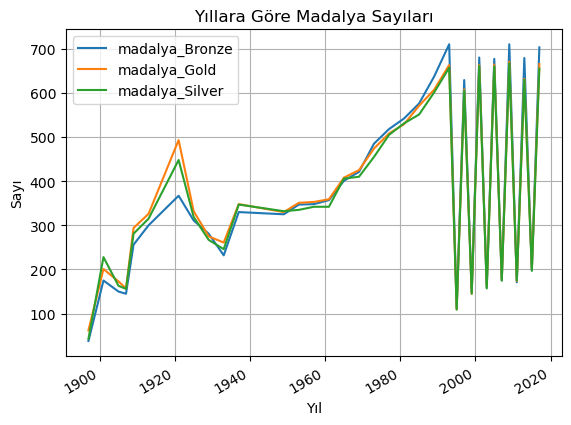

In [118]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [119]:
# yaz ve kış olarak sezonlara ayırma
yaz = veri_zaman[veri_zaman.sezon == 'Summer']
kis = veri_zaman[veri_zaman.sezon == 'Winter']

kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,False,True,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,True,False,False


In [120]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1924-12-31,Clarence John AbelJohan Petter hln (Andersson-...,MMMMMMMMMMMMMMMFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMM...,3919.60,22867.28,9703.58,United StatesSwedenGreat BritainFranceGreat Br...,USASWEGBRFRAGBRSUIAUTFRAAUTNORFINGBRGBRGBRFRAF...,WinterWinterWinterWinterWinterWinterWinterWint...,ChamonixChamonixChamonixChamonixChamonixChamon...,Ice HockeyCurlingIce HockeyCurlingBobsleighMil...,Ice Hockey Men's Ice HockeyCurling Men's Curli...,37,55,38
1928-12-31,Karl Gustaf Emanuel AbrahamssonAlf Steen Ander...,MMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMM...,2265.56,15745.75,6862.50,SwedenNorwaySwedenSwitzerlandSwitzerlandNorway...,SWENORSWESUISUINORNORSWEAUTSUIFRAFRAAUTAUTTCHC...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Ice HockeySki JumpingCross Country SkiingIce H...,Ice Hockey Men's Ice HockeySki Jumping Men's N...,31,30,28
1932-12-31,"Osborne ""Ty"" AndersonSherwin Campbell BadgerRu...",MMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMM...,2431.00,16357.71,7067.76,United StatesUnited States-1GermanyNorwayNorwa...,USAUSAGERNORNORUSAFRAFRAUSAAUTSUIUSACANUSACANC...,WinterWinterWinterWinterWinterWinterWinterWint...,Lake PlacidLake PlacidLake PlacidLake PlacidLa...,Ice HockeyFigure SkatingIce HockeySpeed Skatin...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,28,32,32
1936-12-31,Hans Aichelemile AllaisReidar AndersenAlexande...,MMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMFMMM...,2742.00,19123.20,8101.88,Switzerland-1FranceNorwayGreat BritainGermanyG...,SUIFRANORGBRGERGERNORNORNORNORSUISUISWEGBRSUIG...,WinterWinterWinterWinterWinterWinterWinterWint...,Garmisch-PartenkirchenGarmisch-PartenkirchenGa...,BobsleighAlpine SkiingSki JumpingIce HockeyFig...,Bobsleigh Men's FourAlpine Skiing Men's Combin...,35,36,37
1948-12-31,Jeannette Eleanor Altwegg (-Wirz)Hans Bnninger...,FMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMM...,3643.00,23942.51,10375.92,Great BritainSwitzerlandUnited StatesBelgiumIt...,GBRSUIUSABELITAUSASUISUITCHTCHUSANORUSASUISUIF...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Figure SkatingIce HockeySpeed SkatingFigure Sk...,Figure Skating Women's SinglesIce Hockey Men's...,46,41,48


In [124]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1896-12-31,Ioannis AndreouNikolaos AndriakopoulosEdward B...,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,3418.52,24922.09,10400.97,GreeceGreeceGreat BritainUnited StatesGermanyG...,GREGREGBRUSAGERGERGBRGBRUSAUSAFRAGREGREUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,AthinaAthinaAthinaAthinaAthinaAthinaAthinaAthi...,SwimmingGymnasticsCyclingAthleticsGymnasticsGy...,"Swimming Men's 1,200 metres FreestyleGymnastic...",38,62,43
1900-12-31,Edgar Lindenau AabyeMargaret Ives Abbott (-Dun...,MFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,16783.16,107440.91,45287.89,Denmark/SwedenUnited StatesVesper Boat ClubUni...,DENUSAUSAFRAFRAFRAFRAFRAGERGERNORGBRFRAGBRFRAF...,SummerSummerSummerSummerSummerSummerSummerSumm...,ParisParisParisParisParisParisParisParisParisP...,Tug-Of-WarGolfRowingRugbyRugbySailingSailingFo...,Tug-Of-War Men's Tug-Of-WarGolf Women's Indivi...,175,201,228
1904-12-31,"Louis Grenville ""Lou"" AbellEdgar Holmes AdamsA...",MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,12812.84,86139.17,36124.78,Vesper Boat ClubUnited StatesMohawk Indians-2M...,USAUSACANUSAUSAUSAUSAUSACANUSAUSAUSAUSAUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,St. LouisSt. LouisSt. LouisSt. LouisSt. LouisS...,RowingSwimmingLacrosseRowingCyclingCyclingRowi...,Rowing Men's Coxed EightsSwimming Men's Plunge...,150,173,163
1906-12-31,"George ""Ioannis"" AbbotIoannis AgrimisGeorgios ...",MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,12127.56,80767.19,33925.06,"Thessalonki-1Large boat, Central Naval Prep Sc...",GREGREGREDENDENNORDENGERGERGREGREFRAFRAAUSAUSA...,SummerSummerSummerSummerSummerSummerSummerSumm...,AthinaAthinaAthinaAthinaAthinaAthinaAthinaAthi...,FootballRowingGymnasticsFootballGymnasticsGymn...,Football Men's FootballRowing Men's 17-Man Nav...,145,157,156
1908-12-31,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreic...,FMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,22907.96,146806.47,61262.24,SwedenGreat BritainGreat BritainFranceFranceIr...,SWEGBRGBRFRAFRAGBRGBRGBRGBRNORDENNORDENCANSWES...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,TennisAthleticsLacrosseFencingFencingHockeySho...,"Tennis Women's Singles, Covered CourtsAthletic...",256,294,281


<Figure size 640x480 with 0 Axes>

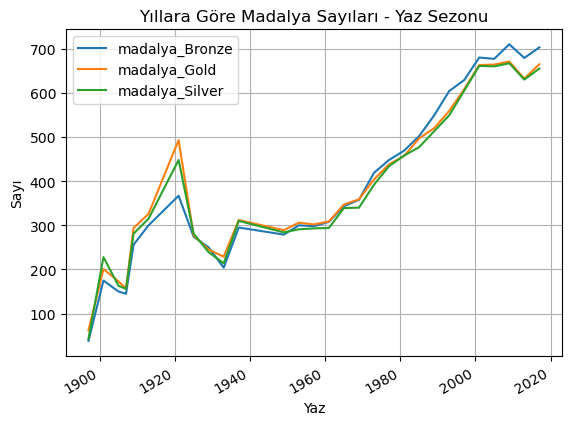

<Figure size 640x480 with 0 Axes>

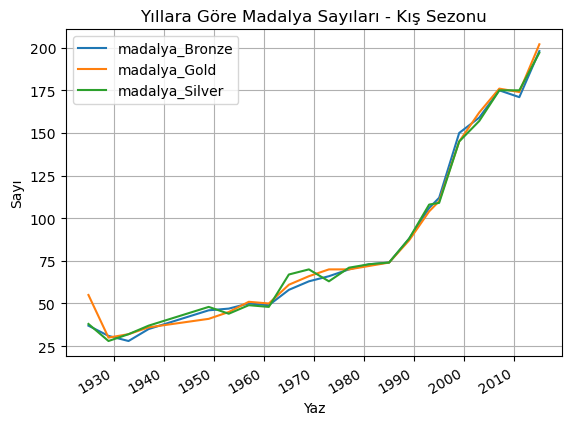

In [128]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yaz")
plt.grid()
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yaz")
plt.grid()
plt.show()